In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\Dipak\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [3]:
train_data[:2]


[[1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_labels[0]

1

In [7]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
len(reverse_word_index)

88584

In [11]:
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension)) 
 for i,sequence in enumerate(sequences):
     results[i,sequence] = 1 
 return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [12]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
X_train.shape

(25000, 10000)

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(
 optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss = losses.binary_crossentropy,
 metrics = [metrics.binary_accuracy]
)

In [29]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(
 partial_X_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - binary_accuracy: 0.6653 - loss: 0.6216 - val_binary_accuracy: 0.8589 - val_loss: 0.4360
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.8820 - loss: 0.3824 - val_binary_accuracy: 0.8799 - val_loss: 0.3326
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9094 - loss: 0.2747 - val_binary_accuracy: 0.8895 - val_loss: 0.2916
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9327 - loss: 0.2112 - val_binary_accuracy: 0.8833 - val_loss: 0.2875
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9477 - loss: 0.1751 - val_binary_accuracy: 0.8874 - val_loss: 0.2769
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.9568 - loss: 0.1467 - val_binary_accuracy: 0.8863 - val_loss: 0.2785
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9609 - loss: 0.1311 - val_binary_accuracy: 0.8793 - val_loss: 0.3018
Epoch 8/20
3

In [31]:
history_dict = history.history
history_dict.keys()


dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

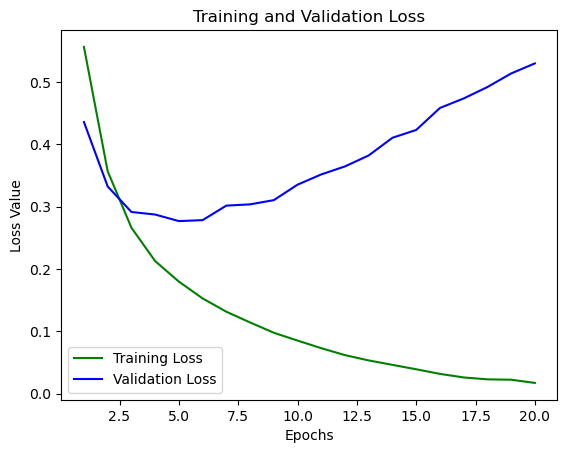

In [32]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


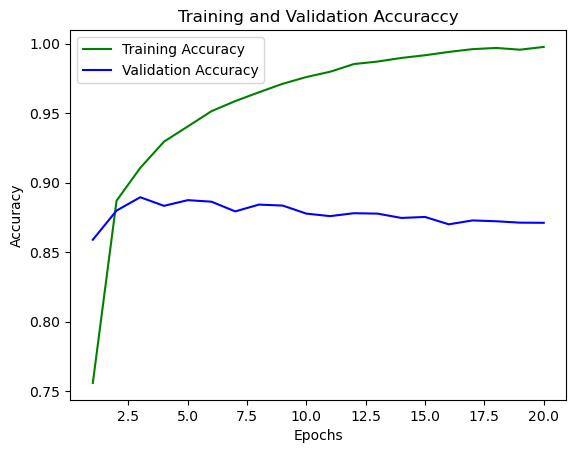

In [33]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
model.fit(
 partial_X_train,
 partial_y_train,
 epochs=3,
 batch_size=512,
 validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - binary_accuracy: 0.9992 - loss: 0.0115 - val_binary_accuracy: 0.8684 - val_loss: 0.5590
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9995 - loss: 0.0099 - val_binary_accuracy: 0.8684 - val_loss: 0.5748
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9997 - loss: 0.0077 - val_binary_accuracy: 0.8666 - val_loss: 0.6060


In [35]:
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [36]:
result

array([[0.00439014],
       [0.99999934],
       [0.6934284 ],
       ...,
       [0.00042755],
       [0.00817041],
       [0.9033781 ]], dtype=float32)

In [43]:
y__pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

C:\Users\Dipak\AppData\Local\Temp\ipykernel_15604\1920469250.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [44]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.1446>